In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#reading and checking data size
data=pd.read_csv("C:\\Users\\Personal\\Desktop\\AirQualityUCI.csv")
data.shape
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
#cheching null values
data.isnull().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               1
dtype: int64

In [26]:
#filling the null values
data.fillna(method='ffill',inplace=True)
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
#data('Hour',_)=pd.factorise(data['Time']) 


SyntaxError: can't assign to function call (<ipython-input-14-407e76e8543f>, line 1)

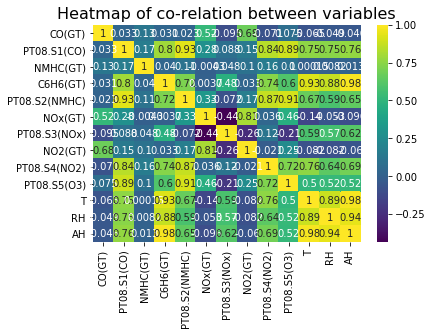

In [16]:
#Use heatmap to see corelation between variables
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

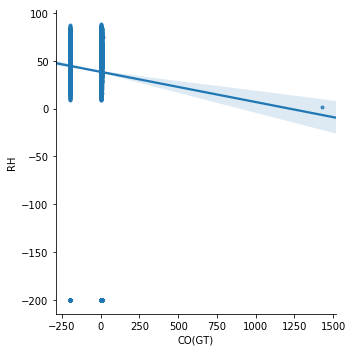

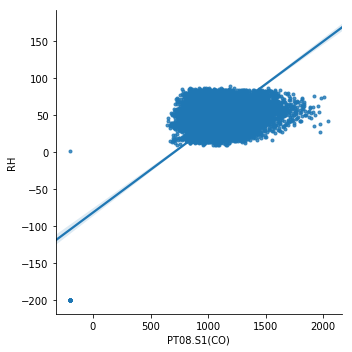

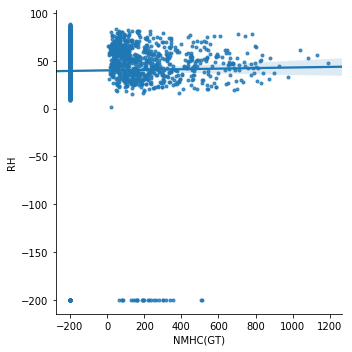

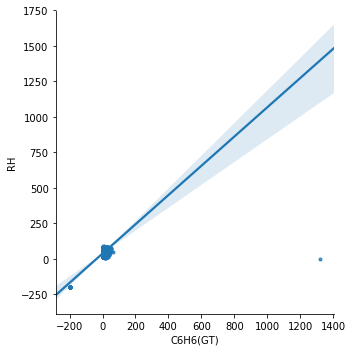

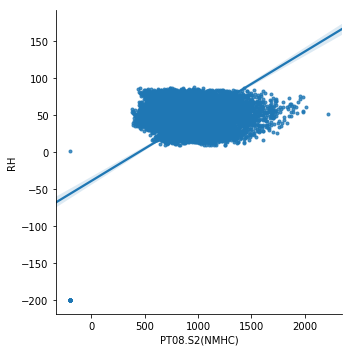

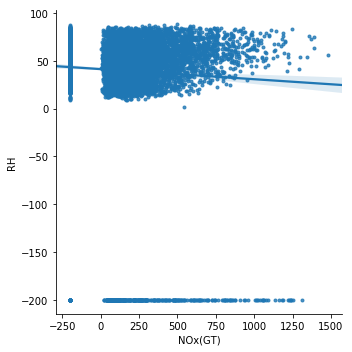

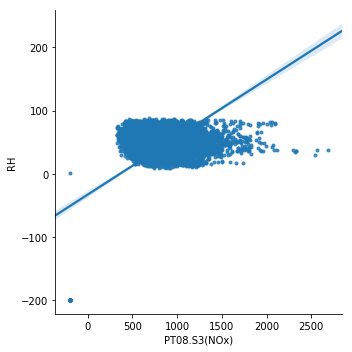

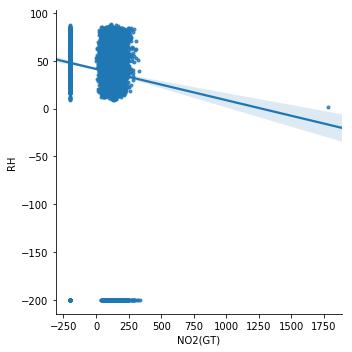

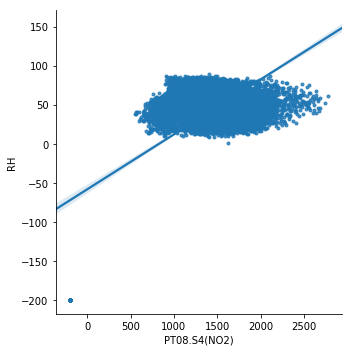

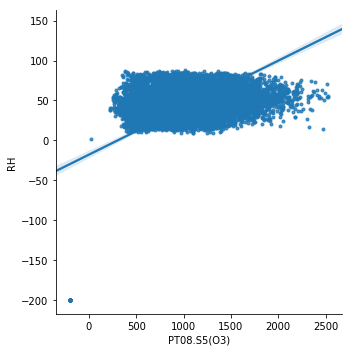

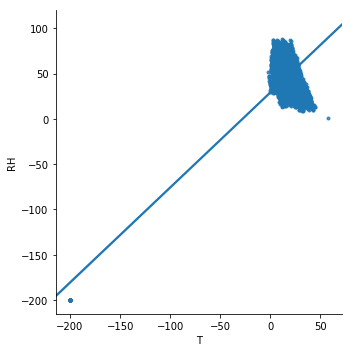

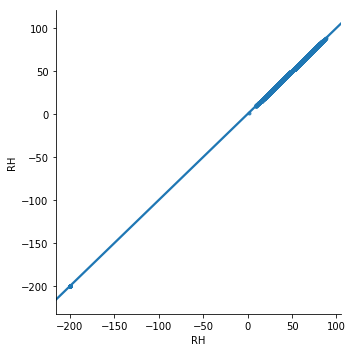

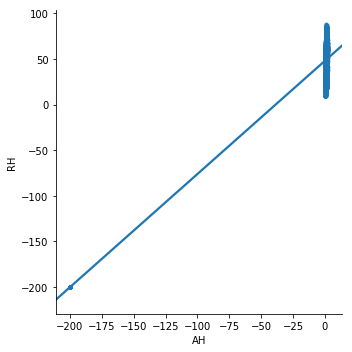

In [19]:
#plot all X-features against output variable RH
col_=data.columns.tolist()[2:]
for i in data.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=data,markers='.')

In [27]:
#import normalisation package
from sklearn.preprocessing import StandardScaler 
#import train test split
from sklearn.model_selection import train_test_split   
#import linear regression package
from sklearn.linear_model import LinearRegression  
#import mean squared error and mean absolute error
from sklearn.metrics import mean_squared_error,mean_absolute_error   

In [37]:
#X-input features
X=data[col_].drop('RH',1) 
#y-input features
y=data['RH'] 
#initiatilise
ss=StandardScaler()   
#apply stardardisation
X_std=ss.fit_transform(X) 
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6549, 12)
Test data size: (2808, 12)


In [41]:
lm=LinearRegression()
lm_model=lm.fit(X_train,y_train) 
print('Intercept:',lm_model.intercept_)
print('Slope:')
list(zip(X.columns.tolist(),lm_model.coef_))

Intercept: 39.492026712724716
Slope:


[('CO(GT)', 0.4319475410611062),
 ('PT08.S1(CO)', 2.527309728837883),
 ('NMHC(GT)', -1.9846501673690788),
 ('C6H6(GT)', -1.1477264039350814),
 ('PT08.S2(NMHC)', -28.423101086737162),
 ('NOx(GT)', 7.219346470072278),
 ('PT08.S3(NOx)', -8.161933610269362),
 ('NO2(GT)', -6.0188169395039735),
 ('PT08.S4(NO2)', 27.750633714012753),
 ('PT08.S5(O3)', 0.11254739526857094),
 ('T', -85.13820300046852),
 ('AH', 135.51213376472853)]

In [43]:
#predict using the model
y_pred=lm_model.predict(X_test)         
#calculate rmse(root mean square error)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 7.992014770718329


In [45]:
# we can predict RH using all the features together with RMSE as 7.99 by using RMSE model

In [46]:
def train_test_RMSE(feature):
    X=data[feature]
    y=data['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lm_model_one=lm.fit(X_trainR,y_trainR)
    y_predR=lm_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [47]:
#remove output
col_.remove('RH')        

In [48]:
#print list of features
print('List of features:',col_)    

List of features: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']


In [49]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))

print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))

print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))

print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))

print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))

print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))

print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)'] 34.01037347975585
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)'] 17.7366638191616
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)'] 16.641431760648324
RMSE with Features as ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)'] 19.832321432794334
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T'] 16.365811675869804
RMSE with Features as ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'] 7.995876331596637
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'] 7.992014770718329


In [50]:
#By the above enodel it looks that baseline model is performing best

In [54]:
#Decision tree regression model
from sklearn.tree import DecisionTreeRegressor 
#import cross validation score package
from sklearn.cross_validation import cross_val_score  
#import grid search cv
from sklearn.model_selection import GridSearchCV       
dt_one_reg=DecisionTreeRegressor()

dt_model=dt_one_reg.fit(X_train,y_train)        
y_pred_dtone=dt_model.predict(X_test)   

print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.2509412410676966


In [55]:
#after applying Dtree model significance improvement of RMSE value to 1.25

In [57]:
####random forest
from sklearn.ensemble import RandomForestRegressor  
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)          
y_pred_rf=rf_model.predict(X_test)      
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.7583714182227652


In [60]:
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)
rf_model_two=rf_grid.fit(X_train,y_train)  
#predict
y_pred_rf_two=rf_model_two.predict(X_test) 
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 1.8728978988771576


In [61]:
#Conclusion: Random Forest
#Applying Random Forest regression the predicted RMSE has improved to 0.75, the default RF algorithm is giving better RMSE value than grid search applied different parameters.

In [62]:
#SVM
from sklearn.svm import SVR           
sv_reg=SVR()
#train the model
sv_model=sv_reg.fit(X_train,y_train)  
#predict
y_pred_sv=sv_model.predict(X_test)         
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 15.263511711252578


In [ ]:
#For designing the model for predicting RH, I have applied Linear Regression, Decision Tree, Random Forest, Support Vector Machine. When tested on test data below are RMSE obtained from different algorithms:

RMSE:

#Linear Regression: 7.99

#Decision Tree: 1.25

#Random Forest: 1.87

#Support Vector Machine: 15.26

#Hence Random Forest algorithm is selected for the prediction of RH using the features.

#Future: Going forward, I would like to try if applying PCA and using day of the month and month of the year as variable, whether model RMSE of prediction gives a better result.